In [136]:
import os
import pandas as pd

stockData = pd.read_csv(os.path.join("datasets/", "DataSet_Excel_Cleaned_final.csv"))

stockData.head(10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,CloseInt
0,4.0,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0,12.577200,1258
1,NaN,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0,12.639900,1264
2,4.0,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0,12.742700,1274
3,4.0,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0,12.864301,1286
4,4.0,1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0,12.885400,1289
5,4.0,1965-01-13,1281.670044,1281.670044,1281.670044,1281.670044,1281.670044,0,12.816700,1282
6,4.0,1965-01-14,1289.500000,1289.500000,1289.500000,1289.500000,1289.500000,0,12.895000,1290
7,4.0,1965-01-18,1271.680054,1271.680054,1271.680054,1271.680054,1271.680054,0,12.716801,1272
8,4.0,1965-01-19,1270.339966,1270.339966,1270.339966,1270.339966,1270.339966,0,12.703400,1270
9,4.0,1965-01-20,1268.880005,1268.880005,1268.880005,1268.880005,1268.880005,0,12.688800,1269


In [137]:
stockData.drop(["Adj Close"], axis=1, inplace=True)

stockData.head(10)

,Index,Date,Open,High,Low,Close,Volume,CloseUSD,CloseInt
0,4.0,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,0,12.577200,1258
1,NaN,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,0,12.639900,1264
2,4.0,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,0,12.742700,1274
3,4.0,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,0,12.864301,1286
4,4.0,1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,0,12.885400,1289
5,4.0,1965-01-13,1281.670044,1281.670044,1281.670044,1281.670044,0,12.816700,1282
6,4.0,1965-01-14,1289.500000,1289.500000,1289.500000,1289.500000,0,12.895000,1290
7,4.0,1965-01-18,1271.680054,1271.680054,1271.680054,1271.680054,0,12.716801,1272
8,4.0,1965-01-19,1270.339966,1270.339966,1270.339966,1270.339966,0,12.703400,1270
9,4.0,1965-01-20,1268.880005,1268.880005,1268.880005,1268.880005,0,12.688800,1269


In [138]:
from sklearn.impute import SimpleImputer

import numpy as np

si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si.fit(stockData)
stockData_ = si.transform(stockData)
stockData = pd.DataFrame(stockData_, columns=stockData.columns)
len(stockData[stockData.isna().any(axis=1)])

0

In [139]:
X = stockData[["Open", "Volume", "Low", "High"]]
Y = stockData[["CloseInt"]]
Y=Y.astype('int')

In [140]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler().fit(X[["Open", "Volume", "Low", "High"]])

def scale(dataframe, columns, scaler):
    scaled = scaler.transform(dataframe[columns])
    dataframe[columns] = pd.DataFrame(scaled, columns=columns)
    return dataframe

X = scale(X, ["Open", "Volume", "Low", "High"], standard_scaler)
X.head()

C:\Users\Liam\AppData\Local\Temp\ipykernel_14964\2714775455.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columns] = pd.DataFrame(scaled, columns=columns)


,Open,Volume,Low,High
0,-1.444217,-0.623586,-1.444764,-1.443835
1,-1.443436,-0.623586,-1.443977,-1.443059
2,-1.442156,-0.623586,-1.442688,-1.441786
3,-1.440641,-0.623586,-1.441163,-1.440280
4,-1.440378,-0.623586,-1.440899,-1.440019


In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
   X, Y, test_size = 0.2, random_state = 42
)

len(X_train), len(X_test)

(11099, 2775)

In [142]:
import joblib

best_model = joblib.load('stockmarket.joblib')
best_model

Ridge(alpha=3.5, solver='saga')

LB 4.1

([<matplotlib.axis.XTick at 0x2664dfddfc0>,
 [Text(0, 0, 'Open'),
  Text(1, 0, 'Volume'),
  Text(2, 0, 'Low'),
  Text(3, 0, 'High')])

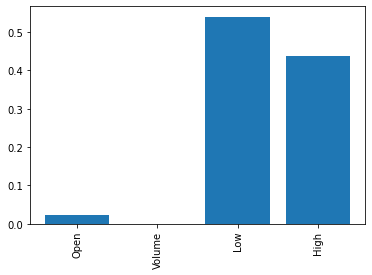

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, Y_train.values.ravel())
plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)

In [144]:
from sklearn.metrics import classification_report

best_model.fit(X_train, Y_train)
prediction = best_model.predict(X_test)

prediction = prediction.astype(int)

LB 4.2/4.3

In [145]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

print(classification_report(prediction, Y_test))

mean_squared_error(prediction, Y_test)

              precision    recall  f1-score   support

        1027       1.00      1.00      1.00         1
        1034       0.00      0.00      0.00         0
        1035       0.00      0.00      0.00         1
        1065       1.00      1.00      1.00         1
        1069       1.00      1.00      1.00         1
        1082       1.00      1.00      1.00         1
        1091       1.00      1.00      1.00         2
        1101       0.00      0.00      0.00         0
        1102       0.00      0.00      0.00         1
        1109       0.00      0.00      0.00         0
        1110       0.00      0.00      0.00         1
        1115       1.00      1.00      1.00         1
        1125       1.00      1.00      1.00         1
        1129       1.00      1.00      1.00         1
        1131       0.00      0.00      0.00         0
        1132       0.00      0.00      0.00         1
        1136       1.00      1.00      1.00         1
        1145       1.00    

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Rec

8241.28972972973

Wahrheitsmatrix:

Bei meinem Datenset macht es meiner Meinung nach nicht Sinn eine Wahrheitsmatrix zu erstellen. Dies hat unterandere den Grund, das alle meine Daten numerisch sind. Ich habe bei mir nur ein kategorisches Feld, welches ich nicht in die Berechnung mit einbezieh, da es irrelevant ist für die Vorhersage. Ich konnte keinen logischen Weg finden eine Wahrheitsmatrix mit numerischen Daten zu machen, da eine Wahrheitsmatrix immer True positive, False positive, True negative und False negative hat. Bei numerischen Daten ist es aber immer entweder richtig oder falsch.

LB 4.4

Mein Modell funktioniert meiner Einschätzung nach nur mässig. Die Genauigkeit ist mit 0.18 relativ tief. Der MSE liegt bei 1638981.2 was bei meinen Daten nicht wriklich der Fall sein sollte. Ich schätze dass der Algorithmus für den MSE nicht allzu gut funktioniert bei mir. Ich weiss, dass der Algorithmus, welchen ich für das Modell verwende nicht optimal ist, wodurch mein Modell ungenau wird. Mit einem anderen Algorithmus könnte man wahrscheinlich bessere Ergebnisse bekommen.